In [60]:
import numpy as np
from numpy.random import random as rand
import matplotlib.pyplot as plt
import math
import time

% matplotlib inline

In [45]:
###-Neightbours-###

def Neighbours(L): ##(right, down, left, up)
        
    n1=np.zeros(L**2, dtype=int)
    n2=np.zeros(L**2, dtype=int)
    n3=np.zeros(L**2, dtype=int)
    n4=np.zeros(L**2, dtype=int)

    for ii in xrange(L):
        for jj in xrange(L):

            kk=(ii+1)+L*jj;

            ix1=ii+1;
            if (ix1 == L): ix1=0;
            n1[kk-1]=(ix1)+L*jj;

            iy2=jj+1
            if (iy2 == L): iy2=0;
            n2[kk-1]=(ii)+L*iy2;

            ix3=ii-1
            if (ix3 == -1): ix3=L-1;
            n3[kk-1]=(ix3)+L*jj;

            iy4=jj-1
            if (iy4 == -1): iy4=L-1;
            n4[kk-1]=(ii)+L*iy4;  
    
    return n1, n2, n3, n4

In [46]:
def Border(L):
    
    W = np.asarray(range(int(L)+2))*int(L+2) + int(L);
    S = np.asarray(range(int(L)+2))*int(L+2) + 1;
    D = np.asarray(range(int(L)+2)) + int(L)*int(L+2);
    Q = np.asarray(range(int(L)+2)) + int(L+2);

    return list(np.concatenate([W[1:-1], S[1:-1], D[2:-2], Q[2:-2]]))

In [47]:
def Flock(X,O):
    
    X = X + np.transpose(np.array([np.cos(O),np.sin(O)]))*v*dt  
    
    for jj in xrange(N):
        
        if X[jj,0] > L/2: X[jj,0] = X[jj,0] - L;
        if X[jj,0] < -L/2: X[jj,0] = X[jj,0] + L;
        if X[jj,1] > L/2: X[jj,1] = X[jj,1] - L;
        if X[jj,1] < -L/2: X[jj,1] = X[jj,1] + L;
    
    NO=np.zeros(N);
    for jj in xrange(N):
        
        XD = X - X[jj,:];
        
        for kk in xrange(N):

            if XD[kk,0] > L/2: XD[kk,0] = XD[kk,0] - L;
            if XD[kk,0] < -L/2: XD[kk,0] = XD[kk,0] + L;
            if XD[kk,1] > L/2: XD[kk,1] = XD[kk,1] - L;
            if XD[kk,1] < -L/2: XD[kk,1] = XD[kk,1] + L;
            
        dist = np.sqrt((XD[jj,0]-XD[:,0])**2+(XD[jj,1]-XD[:,1])**2);
        
        inf = [];
        for zz in xrange(N): 
            if dist[zz] <= 1: inf.append(zz);
            
        NO[jj] = math.atan2(sum(np.sin(O[inf])),sum(np.cos(O[inf]))) + (rand()*eta - eta/2); 
        
    O = NO*1; 
    
    return X, O

In [48]:
def Flock_2(X,O):
    
    X = X + np.transpose(np.array([np.cos(O),np.sin(O)]))*v*dt  
    
    A = np.empty(int(((L+2)**2)),object);
    A [...]=[[] for _ in range(int((L+2)**2))];
    
    for jj in xrange(N):
        
        if X[jj,0] > L/2: X[jj,0] = X[jj,0] - L;
        if X[jj,0] < -L/2: X[jj,0] = X[jj,0] + L;
        if X[jj,1] > L/2: X[jj,1] = X[jj,1] - L;
        if X[jj,1] < -L/2: X[jj,1] = X[jj,1] + L;
            
        A[int(L) + 3 + int(X[jj,0] + L/2) + int(X[jj,1] + L/2)*(int(L) + 2)].append(jj); 
    
    ##Ghost cells update
    ##Sides
    x = np.asarray(range(int(L)+2))*int(L+2); x = x[1:-1];
    y = np.asarray(range(int(L)+2))*int(L+2) + int(L); y = y[1:-1];
    A[x] = A[y];
    
    x = np.asarray(range(int(L)+2))*int(L+2)+int(L+1); x = x[1:-1];
    y = np.asarray(range(int(L)+2))*int(L+2) + 1; y = y[1:-1];
    A[x] = A[y];
    
    x = np.asarray(range(int(L)+2)); x = x[1:-1];
    y = np.asarray(range(int(L)+2)) + int(L)*int(L+2); y = y[1:-1];
    A[x] = A[y];
    
    x = np.asarray(range(int(L)+2)) + int(L+1)*int(L+2); x = x[1:-1];
    y = np.asarray(range(int(L)+2)) + int(L+2); y = y[1:-1];
    A[x] = A[y];
    
    ##Vertexs
    A[0] = A[int(L-1)+int(L)+3+int(L-1)*(int(L)+2)];
    A[int(L)+1] = A[int(L)+3+int(L-1)*(int(L)+2)];
    A[-(int(L)+2)] = A[int(L-1)+int(L)+3];
    A[-1] = A[int(L)+3];
    
    NO=np.zeros(N);
    for jj in xrange(N):
        
        Loc = int(L) + 3 + int(X[jj,0] + L/2) + int(X[jj,1] + L/2)*(int(L) + 2);
        PosInf = A[Loc] + A[n1[Loc]] + A[n2[Loc]] + A[n2[Loc]+1] + A[n2[Loc]-1] + A[n3[Loc]] + A[n4[Loc]] + A[n4[Loc]+1] + A[n4[Loc]-1];
        
        if B.count(Loc) == 1:
            
            XD = X - X[jj,:];
        
            for kk in (PosInf):

                if XD[kk,0] > L/2: XD[kk,0] = XD[kk,0] - L;
                if XD[kk,0] < -L/2: XD[kk,0] = XD[kk,0] + L;
                if XD[kk,1] > L/2: XD[kk,1] = XD[kk,1] - L;
                if XD[kk,1] < -L/2: XD[kk,1] = XD[kk,1] + L;
                    
        else: XD = X * 1;
            
        dist = np.sqrt((XD[jj,0]-XD[PosInf,0])**2+(XD[jj,1]-XD[PosInf,1])**2);
            
        Inf = [];
        for zz in xrange(len(PosInf)): 
            if dist[zz] <= 1: Inf.append(PosInf[zz]);
            
        NO[jj] = math.atan2(sum(np.sin(O[Inf])),sum(np.cos(O[Inf]))) + (rand()*eta - eta/2); 
        
    O = NO*1; 
    
    return X, O

In [49]:
def Flock_3(X,O):

    X[0:N,:] = X[0:N,:] + np.transpose(np.array([np.cos(O),np.sin(O)]))*v*dt  
    X[N:,:] = np.zeros((3*N,2));
    
    A = np.empty(int(((L+2)**2)),object);
    A [...]=[[] for _ in range(int((L+2)**2))];
    
    for jj in xrange(N):
        
        if X[jj,0] > L/2: X[jj,0] = X[jj,0] - L;
        if X[jj,0] < -L/2: X[jj,0] = X[jj,0] + L;
        if X[jj,1] > L/2: X[jj,1] = X[jj,1] - L;
        if X[jj,1] < -L/2: X[jj,1] = X[jj,1] + L;
            
        A[int(L) + 3 + int(X[jj,0] + L/2) + int(X[jj,1] + L/2)*(int(L) + 2)].append(jj); 
    
    ##Ghost cells update
    ##Sides
    x = np.asarray(range(int(L)+2))*int(L+2); x = x[1:-1];
    y = np.asarray(range(int(L)+2))*int(L+2) + int(L); y = y[1:-1];
    Ay = np.asarray(A[y]); A[x] = list(Ay+(1+N)); 
    X[ A[x] , 0] = X[Ay] - L; X[ A[x] , 1] = X[Ay];   
    
    x = np.asarray(range(int(L)+2))*int(L+2)+int(L+1); x = x[1:-1];
    y = np.asarray(range(int(L)+2))*int(L+2) + 1; y = y[1:-1];
    Ay = np.asarray(A[y]); A[x] = list(Ay+ (1+N));
    X[ A[x] , 0] = X[Ay] + L; X[ A[x] , 1] = X[Ay];
    
    x = np.asarray(range(int(L)+2)); x = x[1:-1];
    y = np.asarray(range(int(L)+2)) + int(L)*int(L+2); y = y[1:-1];
    Ay = np.asarray(A[y]); A[x] = list(Ay+(1+2*N));
    X[ A[x] , 0] = X[Ay]; X[ A[x] , 1] = X[Ay] - L;
    
    x = np.asarray(range(int(L)+2)) + int(L+1)*int(L+2); x = x[1:-1];
    y = np.asarray(range(int(L)+2)) + int(L+2); y = y[1:-1];
    Ay = np.asarray(A[y]); A[x] = list(Ay+(1+2*N));
    X[ A[x] , 0] = X[Ay]; X[ A[x] , 1] = X[Ay] + L;
    
    ##Vertexs
    x = 0; y = int(L-1)+int(L)+3+int(L-1)*(int(L)+2);
    Ay = np.asarray(A[y]); A[x] = list(Ay+(1+3*N));
    X[ A[x] , 0] = X[Ay] - L; X[ A[x] , 1] = X[Ay] - L;
    
    x = int(L)+1; y = int(L)+3+int(L-1)*(int(L)+2);
    Ay = np.asarray(A[y]); A[x] = list(Ay+(1+3*N));
    X[ A[x] , 0] = X[Ay] + L; X[ A[x] , 1] = X[Ay] - L;
    
    x = -(int(L)+2); y = int(L-1)+int(L)+3;
    Ay = np.asarray(A[y]); A[x] = list(Ay+(1+3*N));
    X[ A[x] , 0] = X[Ay] - L; X[ A[x] , 1] = X[Ay] + L;
    
    x = -1; y = int(L)+3;
    Ay = np.asarray(A[y]); A[x] = list(Ay+(1+3*N));
    X[ A[x] , 0] = X[Ay] + L; X[ A[x] , 1] = X[Ay] + L;
    
    NO=np.zeros(N);
    for jj in xrange(N):
        
        Loc = int(L) + 3 + int(X[jj,0] + L/2) + int(X[jj,1] + L/2)*(int(L) + 2);
        PosInf = A[Loc] + A[n1[Loc]] + A[n2[Loc]] + A[n2[Loc]+1] + A[n2[Loc]-1] + A[n3[Loc]] + A[n4[Loc]] + A[n4[Loc]+1] + A[n4[Loc]-1];
               
        dist = np.sqrt((XD[jj,0]-XD[PosInf,0])**2+(XD[jj,1]-XD[PosInf,1])**2);
            
        Inf = [];
        for zz in xrange(len(PosInf)): 
            if dist[zz] <= 1: Inf.append(PosInf[zz]);
            
        NO[jj] = math.atan2(sum(np.sin(O[Inf])),sum(np.cos(O[Inf]))) + (rand()*eta - eta/2); 
        
    O = NO*1; 
    
    return X, O

In [50]:
def Flock_4(X,O,P):
    
    P = P + 1;
    X = X + np.transpose(np.array([np.cos(O),np.sin(O)]))*v*dt; 
    
    for jj in xrange(N):
        
        if X[jj,0] > L/2: X[jj,0] = X[jj,0] - L;
        if X[jj,0] < -L/2: X[jj,0] = X[jj,0] + L;
        if X[jj,1] > L/2: X[jj,1] = X[jj,1] - L;
        if X[jj,1] < -L/2: X[jj,1] = X[jj,1] + L;
    
    NO=np.zeros(N);
    for jj in xrange(N):
        
        XD = X - X[jj,:];
        
        for kk in xrange(N):

            if XD[kk,0] > L/2: XD[kk,0] = XD[kk,0] - L;
            if XD[kk,0] < -L/2: XD[kk,0] = XD[kk,0] + L;
            if XD[kk,1] > L/2: XD[kk,1] = XD[kk,1] - L;
            if XD[kk,1] < -L/2: XD[kk,1] = XD[kk,1] + L;
            
        dist = np.sqrt((XD[jj,0]-XD[:,0])**2+(XD[jj,1]-XD[:,1])**2);
        
        inf = [];
        for zz in xrange(P): 
            target=np.argmin(dist); dist[target]=5*L;
            inf.append(target);
            
        NO[jj] = math.atan2(sum(np.sin(O[inf])),sum(np.cos(O[inf]))) + (rand()*eta - eta/2); 
        
    O = NO*1; 
    
    return X, O

# Video

In [ ]:
##Model
L = 9.; ##size of the square cell
r = 1.; ##interaction radius
N = 325; ##number of particles
v = 0.3 ##Absolute velocity
eta = 0.1; ##Fluctuations

##Saving
file="Flock/Flock"

##Time
Tmax=200; dt=1; 
ST=int(Tmax/dt)+1; Tvec=np.linspace(0,Tmax,ST);

##Inicialization
X = rand((N,2))*L - L/2 ##Random positions
O = rand(N)*2*np.pi - np.pi ##Random directions

st = time.time();

n1, n2, n3, n4 = Neighbours(int(L+2));
B = Border(int(L));

for ii in xrange(ST):
    
    X, O = Flock_2(X,O);
    
    plt.figure(figsize=(20,20));
    f = plt.quiver(X[:,0],X[:,1],np.cos(O),np.sin(O));
    plt.axis([-L/2, L/2, -L/2, L/2]);
    plt.savefig(file+str(ii)+".png");
    plt.hold(False);

ft = time.time() - st;
print ft

In [ ]:
##Model
L = 25.; ##size of the square cell
r = 1.; ##interaction radius
N = 300; ##number of particles
v = 0.3 ##Absolute velocity
eta = 0.1; ##Fluctuations
P = 7; ##Influence Birds

##Saving
file="Flock/Flock"

##Time
Tmax=200; dt=1; 
ST=int(Tmax/dt)+1; Tvec=np.linspace(0,Tmax,ST);

##Inicialization
X = rand((N,2))*L - L/2 ##Random positions
O = rand(N)*2*np.pi - np.pi ##Random directions

st = time.time();

for ii in xrange(ST):
    
    X, O = Flock_4(X,O,P);
    
    plt.figure(figsize=(20,20));
    f = plt.quiver(X[:,0],X[:,1],np.cos(O),np.sin(O));
    plt.axis([-L/2, L/2, -L/2, L/2]);
    plt.savefig(file+str(ii)+".png");
    plt.hold(False);
    
ft = time.time() - st;
print ft

# Phase transition

In [ ]:
##Model
Lvec = [3., 5., 7., 9., 11.]; ##size of the square cell
Nvec = [36, 100, 200, 325, 490]; ##number of particles
etavec = np.linspace(5.,0.2,50); ##Fluctuations

r = 1.; ##interaction radius
v = 0.3 ##Absolute velocity

##Saving
file="Flocking2_N"

##Termalization
M0 = 250;
#Mesures
M = 250;
R = 1;
Va = np.zeros((len(Nvec),len(etavec)));
Err = np.zeros((len(Nvec),len(etavec)));

for zz in xrange(len(Nvec)):
    
    N = Nvec[zz]; L = Lvec[zz];
    
    n1, n2, n3, n4 = Neighbours(int(L+2));
    B = Border(int(L));
    
    for jj in xrange(R):
        
        ##Inicialization
        X = rand((N,2))*L - L/2 ##Random positions
        O = rand(N)*2*np.pi - np.pi ##Random directions

        for kk in xrange(len(etavec)):

            eta = etavec[kk];

            ##thermalization
            for ii in xrange(M0):
                X, O = Flock_2(X,O); 

            NVel = NVel2 = 0;

            ##mesures
            for ii in xrange(M):
                X, O = Flock_2(X,O);
                va = np.sqrt((sum(np.cos(O))**2+(sum(np.sin(O))**2)))/N;

                NVel = NVel + va
                NVel2 = NVel2 + va**2;

            Va[zz, kk] = Va[zz, kk] + NVel/(R*M);
            Err[zz,kk] = Err[zz,kk] + (NVel2/M - NVel**2/(M**2))/R;
        
            print eta
        
    np.savetxt(file+str(N)+".dat",zip(etavec, Va[zz,:], Err[zz,:]))

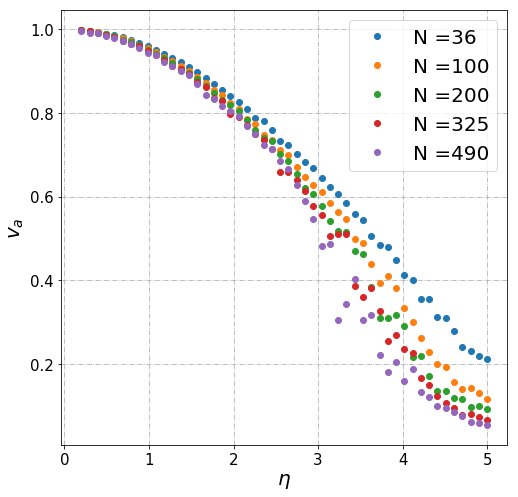

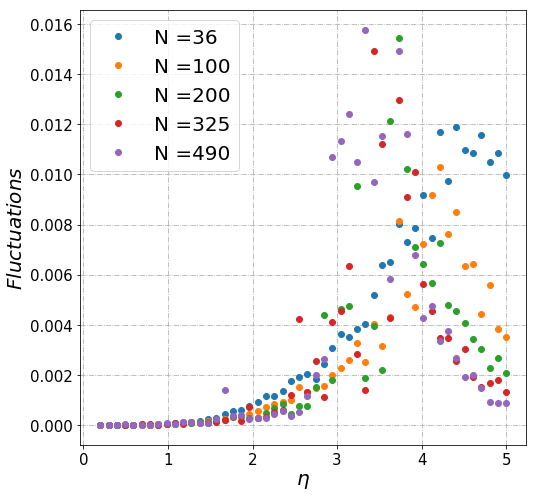

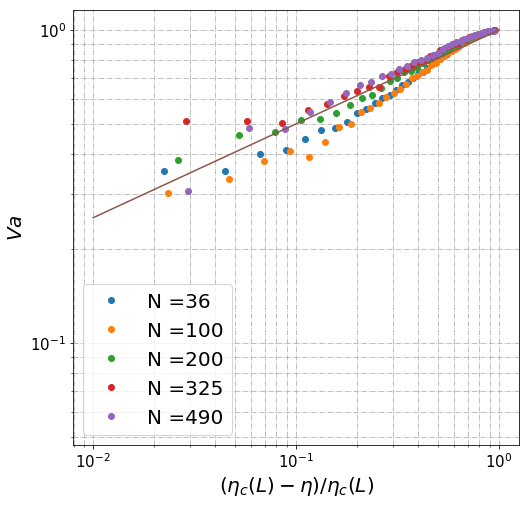

In [72]:
##Saving
file="Flocking3_N"

Nvec = [36, 100, 200, 325, 490]; ##number of particles

##Figures
plt.figure(figsize=(8, 8)); # plot the calculated values
plt.figure(1)

plt.figure(figsize=(8, 8)); # plot the calculated values
plt.figure(2)

plt.figure(figsize=(8, 8)); # plot the calculated values
plt.figure(3)

beta = 0.30;
x = np.logspace(-2,0,100);
y = x**beta;

for ii in xrange(5):
    
    N = Nvec[ii];
    etavec, Va, Err = np.loadtxt(file+str(N)+".dat", unpack=True);
    
    plt.figure(1)
    plt.plot(etavec,Va,'o', label= 'N =' + str(N));
    plt.legend(prop={'size': 20});
    plt.xlabel('$\eta$',fontsize=20);
    plt.xticks(fontsize=15);
    plt.yticks(fontsize=15);
    plt.ylabel('$v_a$',fontsize=20);
    plt.grid(ls='-.');
    
    plt.figure(2);
    plt.plot(etavec,Err,'o', label= 'N =' + str(N));
    plt.legend(prop={'size': 20});
    plt.xlabel('$\eta$',fontsize=20);
    plt.ylabel('$Fluctuations$',fontsize=20);
    plt.xticks(fontsize=15);
    plt.yticks(fontsize=15);
    plt.grid(ls='-.');
    
    etc = etavec[np.argmax(Err)];
    etavec = ( etc - etavec )/etc;
    
    plt.figure(3);
    plt.plot(etavec,Va,'o', label= 'N =' + str(N));
    plt.legend(prop={'size': 20});
    plt.xlabel('$(\eta_c(L)-\eta)/\eta_c(L)$',fontsize=20);
    plt.ylabel('$Va$',fontsize=20);
    plt.xticks(fontsize=15);
    plt.yticks(fontsize=15);
    plt.xscale('log');
    plt.yscale('log');
    plt.grid(ls='-.',which="both");

plt.figure(3);
plt.plot(x,y);
plt.show();

## Thermalization

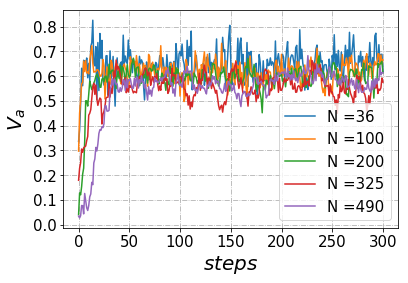

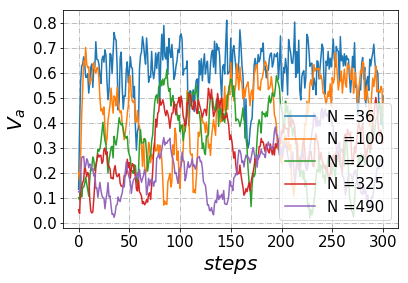

In [66]:
##Model
r = 1.; ##interaction radius
v = 0.3 ##Absolute velocity
eta = 3.; ##Fluctuations

Lvec = [3., 5., 7., 9., 11.]; ##size of the square cell
Nvec = [36, 100, 200, 325, 490]; ##number of particles

##Time
Tmax=300; dt=1; 
ST=int(Tmax/dt)+1; Tvec=np.linspace(0,Tmax,ST);

Va = np.zeros((len(Nvec),ST));

for zz in xrange(len(Nvec)):
    
    N = Nvec[zz]; L = Lvec[zz];
    
    ##Inicialization
    X = rand((N,2))*L - L/2 ##Random positions
    O = rand(N)*2*np.pi - np.pi ##Random directions

    n1, n2, n3, n4 = Neighbours(int(L+2));
    B = Border(int(L));

    for ii in xrange(ST):

        X, O = Flock_2(X,O);
        va = np.sqrt((sum(np.cos(O))**2+(sum(np.sin(O))**2)))/N;

        Va[zz,ii] = va;

for ii in xrange(len(Nvec)):
    
    plt.figure(7);
    plt.plot(Va[ii,:],label='N =' + str(Nvec[ii]));
    plt.xlabel('$steps$',fontsize=20);
    plt.xticks(fontsize=15);
    plt.yticks(fontsize=15);
    plt.ylabel('$V_a$',fontsize=20);
    plt.grid(ls='-.');
    plt.legend(loc='lower right',prop={'size': 15})

plt.show();


##############################


##Model
r = 1.; ##interaction radius
v = 0.3 ##Absolute velocity
eta = 3.; ##Fluctuations
P = 7; ##Influencerers

Lvec = [3., 5., 7., 9., 11.]; ##size of the square cell
Nvec = [36, 100, 200, 325, 490]; ##number of particles

##Time
Tmax=300; dt=1; 
ST=int(Tmax/dt)+1; Tvec=np.linspace(0,Tmax,ST);

Va = np.zeros((len(Nvec),ST));

for zz in xrange(len(Nvec)):
    
    N = Nvec[zz]; L = Lvec[zz];
    
    ##Inicialization
    X = rand((N,2))*L - L/2 ##Random positions
    O = rand(N)*2*np.pi - np.pi ##Random directions

    for ii in xrange(ST):

        X, O = Flock_4(X,O,P);
        va = np.sqrt((sum(np.cos(O))**2+(sum(np.sin(O))**2)))/N;

        Va[zz,ii] = va;

for ii in xrange(len(Nvec)):
    
    plt.figure(8);
    plt.plot(Va[ii,:],label='N =' + str(Nvec[ii]));
    plt.xlabel('$steps$',fontsize=20);
    plt.xticks(fontsize=15);
    plt.yticks(fontsize=15);
    plt.ylabel('$V_a$',fontsize=20);
    plt.legend(loc='lower right',prop={'size': 15});
    plt.grid(ls='-.');

plt.show();